### 차트

https://frhyme.github.io/python-lib/plt_pie/

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'NanumGothicCoding'
matplotlib.rcParams['axes.unicode_minus'] = False

In [91]:
df = pd.read_csv('./data/음식점_리뷰_결과_정리.csv', index_col=False)
display(df.head())

,title,address,total,pos,neg,percent,lat,lon
0,88버거,제주 서귀포시 동문로 63,32,30,2,93.750000,126.567221,33.249281
1,CAFE EPL,제주 서귀포시 남원읍 위미항구로 8,40,38,2,95.000000,126.657042,33.275223
2,SALON de LAVANT,제주 제주시 애월읍 하가로 146-9,11,11,0,100.000000,126.348985,33.457823
3,VIPS 빕스 제주연동점,제주 제주시 연삼로 2,202,181,21,89.603960,126.492629,33.493504
4,ZZZ제주흑돼지,제주 제주시 신대로 104,31,26,5,83.870968,126.496157,33.488208


In [105]:
df = df[df['total']>=50]
df = df.sort_values('percent')
df

,title,address,total,pos,neg,percent,lat,lon
67,돈사돈,제주 제주시 우평로 19,66,47,19,71.212121,126.464032,33.478913
343,해월정,제주 제주시 구좌읍 해맞이해안로 2340,63,45,18,71.428571,126.909694,33.492216
27,국수바다본점,제주 서귀포시 일주서로 982,58,43,15,74.137931,126.406028,33.258496
171,수우동,제주 제주시 한림읍 협재1길 11,88,67,21,76.136364,126.242484,33.396613
266,제주김만복 본점,제주 제주시 오라로 41,125,97,28,77.600000,126.508491,33.497103
...,...,...,...,...,...,...,...,...
52,다미진횟집,제주 서귀포시 표선면 민속해안로 578-1,71,71,0,100.000000,126.844109,33.325100
329,하하호호,제주 제주시 우도면 우도해안길 532,53,53,0,100.000000,126.948609,33.520892
259,제주 정직한돈 협재한림점,제주 제주시 한림읍 일주서로 5083,211,211,0,100.000000,126.250395,33.389114
273,제주앞바다횟집,제주 제주시 동한두기길 29,61,61,0,100.000000,126.515483,33.516911


In [143]:
values = [100-df.iloc[0,5],df.iloc[0,5]]
values

[28.787878787878782, 71.21212121212122]

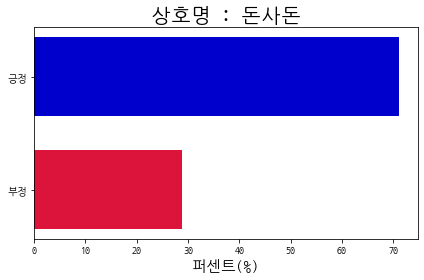

In [166]:
plt.figure(figsize=(6,4))
plt.title('상호명 : '+df.iloc[0,0],size=20)
plt.barh(['부정','긍정'],values, height=0.7, color=['crimson','mediumblue'])
plt.xlabel('퍼센트(%)',size=15)
plt.tight_layout()

plt.show()

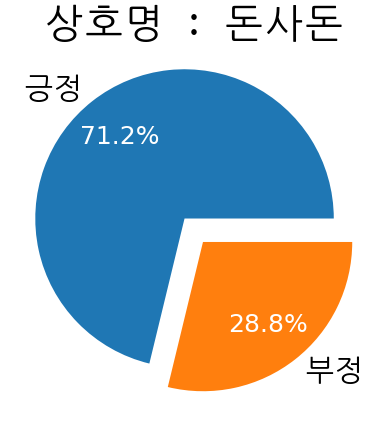

In [102]:
plt.figure(figsize=(6,6))
p, texts, autotexts = plt.pie([df.iloc[0,3],df.iloc[0,4]], autopct='%0.1f%%', pctdistance=0.7
                              ,startangle=0, labels=['긍정','부정'], explode=(0.1, 0.1))

for text in texts:
    text.set_fontsize(30)
    
for text in autotexts:
    text.set_fontproperties('bold')
    text.set_fontsize(25)
    text.set_color('white')

plt.title('상호명 : '+df.iloc[0,0],size=40)
plt.tight_layout()
plt.savefig('./data/images/%s.jpg'%df.iloc[0,0])
plt.show()

### 워드클라우드

In [22]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [49]:
df = pd.read_csv('./data/음식점_리뷰_결과.csv', index_col=False)
display(df.head())

,title,address,review,point,posneg,predict
0,마돈,제주 서귀포시 성산읍 섭지코지로 56,난생 처음 먹어보는 말고기 맛있어요 비리지도않고,5.0,1,1
1,월정리 해녀식당,제주 제주시 구좌읍 해맞이해안로 434,갈치조림이 우와...놀러갓다 방문한곳인데 여기 앞으로 자주 올거같아요 ㅠㅠ 경치도 ...,5.0,1,1
2,한림칼국수,제주 제주시 한림읍 한림해안로 141,건강한 맛으로 든든하게 한끼먹었습니다 국물에밥말아먹으니 더맛있네요ㅋ,5.0,1,1
3,하이엔드제주,제주 제주시 애월읍 애월북서길 56,예쁘지만 비싸요ㅠ.,3.5,1,1
4,VIPS 빕스 제주연동점,제주 제주시 연삼로 2,할인이벤트가 많아서.좋아요. ^^,4.0,1,1


In [50]:
pos = []
neg = []
for i in range(len(df)):
    if df.iloc[i][5] == 0:
        neg.append(df.iloc[i][2])
    else:
        pos.append(df.iloc[i][2])

pos = ' '.join(pos)
neg = ' '.join(neg)

In [51]:
from konlpy.tag import Okt
import nltk
okt = Okt()

text_pos = []
text_neg = []

for i in okt.pos(pos):
    if i[1] == 'Noun':
        text_pos.append(i[0])
    elif i[1] == 'Verb':
        text_pos.append(i[0])
    elif i[1] == 'Adjective':
        text_pos.append(i[0])
        
for i in okt.pos(neg):
    if i[1] == 'Noun':
        text_neg.append(i[0])
    elif i[1] == 'Verb':
        text_neg.append(i[0])
    elif i[1] == 'Adjective':
        text_neg.append(i[0])

In [52]:
from collections import Counter
t_pos = Counter(text_pos)
t_wc_pos = ''
for i in t_pos.most_common(1000):
    t_wc_pos += i[0] + ' '

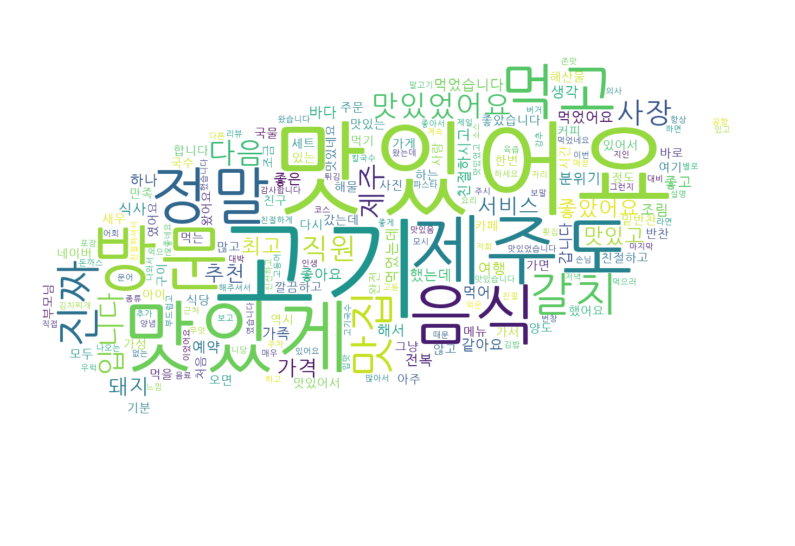

In [53]:
mask = np.array(Image.open('./data/jeju.png'))
wc = WordCloud(font_path='./data/NanumGothicCoding.ttf',
               background_color='white', mask=mask,
               stopwords=STOPWORDS)
wc = wc.generate(t_wc_pos)
plt.figure(figsize=(14,14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('./data/images/wordcloud_pos_food.png')
plt.show()

In [54]:
t_neg = Counter(text_neg)
t_wc_neg = ''
for i in t_neg.most_common(1000):
    t_wc_neg += i[0] + ' '

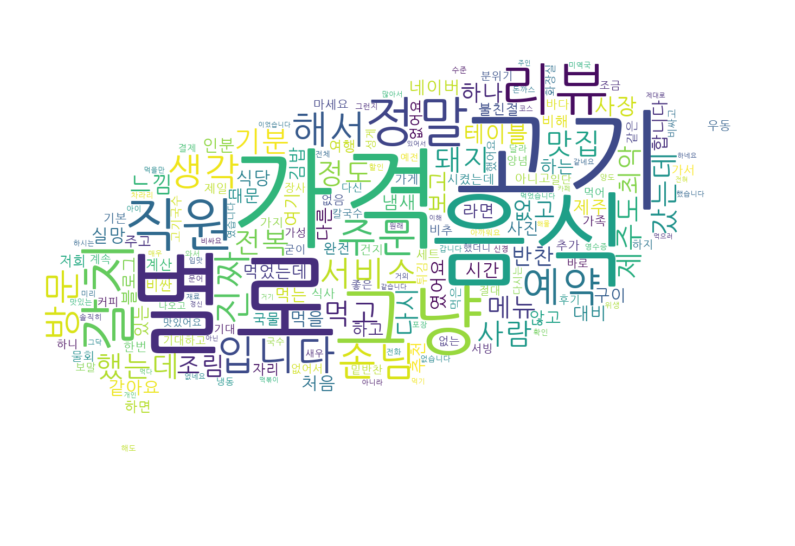

In [55]:
mask = np.array(Image.open('./data/jeju.png'))
wc = WordCloud(font_path='./data/NanumGothicCoding.ttf',
               background_color='white', mask=mask,
               stopwords=STOPWORDS)
wc = wc.generate(t_wc_neg)
plt.figure(figsize=(14,14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('./data/images/wordcloud_neg_food.png')
plt.show()

### 지도에 나타내기

In [56]:
import numpy as np
import pandas as pd
import re
import time
import urllib
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from selenium import webdriver
import seaborn as sns
import folium

In [86]:
df = pd.read_csv('./data/음식점_리뷰_결과_정리.csv', index_col=False)
display(df.head())

,title,address,total,pos,neg,percent,lat,lon
0,88버거,제주 서귀포시 동문로 63,32,30,2,93.750000,126.567221,33.249281
1,CAFE EPL,제주 서귀포시 남원읍 위미항구로 8,40,38,2,95.000000,126.657042,33.275223
2,SALON de LAVANT,제주 제주시 애월읍 하가로 146-9,11,11,0,100.000000,126.348985,33.457823
3,VIPS 빕스 제주연동점,제주 제주시 연삼로 2,202,181,21,89.603960,126.492629,33.493504
4,ZZZ제주흑돼지,제주 제주시 신대로 104,31,26,5,83.870968,126.496157,33.488208


In [58]:
lat = [] # 위도
lon = [] # 경도

url = 'http://www.dawuljuso.com/'

driver = webdriver.Chrome(executable_path='E:/Big_Data_Study/python/chromedriver.exe')
# driver = webdriver.Chrome(executable_path='../chromedriver')
driver.implicitly_wait(1)

driver.get(url)

time.sleep(3)

e = driver.find_element_by_id('input_juso')
i=0
while True:
    e.clear()
    e.send_keys(df.iloc[i][1])
    driver.find_element_by_id('btnSch').click()
    time.sleep(0.5)
    html = driver.page_source
    soup = bs(html, 'html.parser')
    
    if soup.select_one('td#insert_data_1').text == df.iloc[i][1]:
        time.sleep(0.2)
        latlon = soup.select_one('td#insert_data_5')
        if latlon.text.split(':')[1].split(',')[0] != '우편번호없음':
            lat.append(float(latlon.text.split(':')[1].split(',')[0]))
            lon.append(float(latlon.text.split(':')[2]))
            i += 1
        else:
            lat.append('없음')
            lon.append('없음')
            i += 1
    if i == len(df):
        break
    time.sleep(0.5)

In [59]:
len(df),len(lat), len(lon),

(354, 354, 354)

In [60]:
df['lat'] = lat
df['lon'] = lon
df.to_csv('./data/음식점_리뷰_결과_정리.csv', index=False, encoding='utf-8')

In [3]:
df = pd.read_csv('./data/음식점_리뷰_결과_정리.csv', index_col=False)
df = df[df['total']>=50]
df = df[df['percent']<=85]
display(df)

,title,address,total,pos,neg,percent,lat,lon
27,국수바다본점,제주 서귀포시 일주서로 982,58,43,15,74.137931,126.406028,33.258496
67,돈사돈,제주 제주시 우평로 19,66,47,19,71.212121,126.464032,33.478913
71,돌카롱 사려니숲길점,제주 제주시 조천읍 비자림로 422-2,86,71,15,82.558140,126.657062,33.425847
75,동문올레수산,제주 제주시 관덕로14길 10,65,53,12,81.538462,126.526250,33.512265
110,바다다,제주 서귀포시 대포로 148-15,51,43,8,84.313725,126.436771,33.237406
125,복자씨연탄구이,제주 서귀포시 성산읍 해맞이해안로 2764,62,52,10,83.870968,126.919906,33.469197
171,수우동,제주 제주시 한림읍 협재1길 11,88,67,21,76.136364,126.242484,33.396613
191,앙뚜아네트,제주 제주시 중앙로 13,50,42,8,84.000000,126.526096,33.516970
245,자매국수,제주 제주시 삼성로 67,99,82,17,82.828283,126.532440,33.508159
251,전망좋은횟집,제주 서귀포시 성산읍 일출로 248,59,47,12,79.661017,126.932575,33.460684


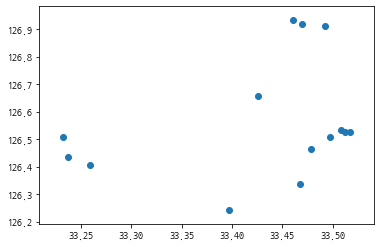

In [4]:
plt.scatter(data=df,x='lon',y='lat')
plt.show()

In [88]:
geo_df = df.copy()

map = folium.Map(
    location=[geo_df['lon'].mean(), geo_df['lat'].mean()],
    zoom_start=10,
)

for i in geo_df.index:
    popup_name = geo_df.loc[i,'title']
    
    folium.Marker(
        [geo_df['lon'][i],geo_df['lat'][i]],
        popup=popup_name,
        icon=folium.Icon(color='red')
    ).add_to(map)

map.save('./data/음식점_리뷰_결과_정리_folium.html')
map